Uploaded the Zip file of the harvard.mat & IndianTourism.mat files and Uploaded them in drive. Downloading that zip file using **gdown**

In [1]:
!gdown "1kle0xNhT2T28wS6X9ne_qGo92PTKBxkF"

Downloading...
From: https://drive.google.com/uc?id=1kle0xNhT2T28wS6X9ne_qGo92PTKBxkF
To: /content/Matrix_Theory.zip
100% 28.9k/28.9k [00:00<00:00, 47.5MB/s]


Unzipping the zip file using **unzip**

In [2]:
#If run twice, Please respond to overwrite All
!unzip "/content/Matrix_Theory.zip"

Archive:  /content/Matrix_Theory.zip
  inflating: IndianTourism.mat       
  inflating: __MACOSX/._IndianTourism.mat  
  inflating: harvard.mat             
  inflating: __MACOSX/._harvard.mat  


Importing required packages

In [3]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

Retrieving list of URLs and their corresponding Connectivity Matrices from Hardvard.mat and IndianTourism.mat

In [4]:
Ind_tour = loadmat('/content/IndianTourism.mat')
G_Ind_tour = Ind_tour["G"]
U_Ind_tour = Ind_tour["U"]
Harvard = loadmat("/content/harvard.mat")
G_Harvard = Harvard["G"]
U_Harvard = Harvard["U"]

Producing the Spy plot of Sparse Connectivity Matrices of Harvard University and IndianTourism websites

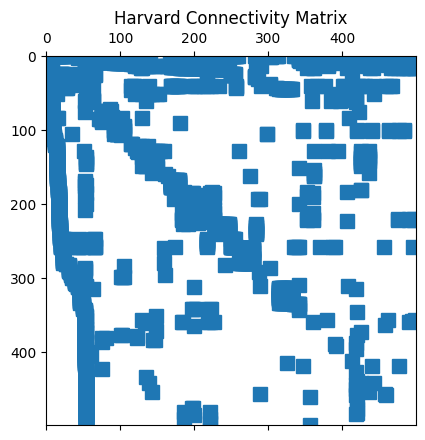

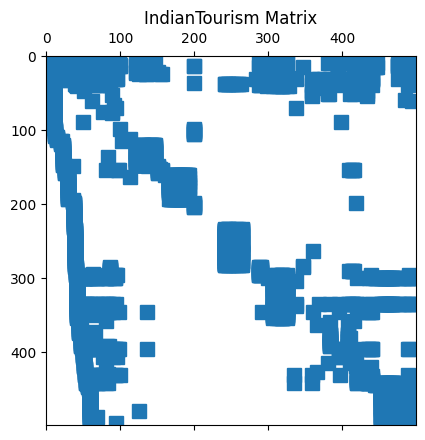

In [5]:
plt.spy(G_Harvard)
plt.title("Harvard Connectivity Matrix")
plt.show()
plt.spy(G_Ind_tour)
plt.title("IndianTourism Matrix")
plt.show()

Function based on the power method to compute Google’s PageRank vector  **x = PageRank(U,G,p)**

In [6]:
def PageRank(U,G,p,title):

  m,n = np.shape(G)
  # computing outdegree
  c = G.sum(axis=0)
  c = np.asarray(c).reshape(-1)
  # computing indegree
  b = G.sum(axis=1)
  b = np.asarray(b).reshape(-1)
  #Converting CSC matrix to numpy matrix
  G = G.toarray()
  # Calculating transition probability matrix of  the  Markov  chain
  A = np.zeros((m,n))
  # A=np.array([(p * G[i][j] / c[j] + (1-p)/n if c[j]!=0 else 1/n for i in range(m))for j in range(n)])
  for i in range(m):
    for j in range(n):
      if c[j] != 0:
        A[i][j] = p * G[i][j] / c[j] + (1-p)/n
      else:
        A[i][j] = 1/n
  # Initializing x - Perron / Eigen Vector associated with leading eigen value of A
  x= np.ones((n,1))
  for l in range(1000):
    x_n = np.linalg.norm(x,ord=1)
    a   = A.dot(x)
    x   = a /x_n
    ratio = np.linalg.norm(a,ord=1)/x_n
    if (ratio ==1):
      print("Converges to 1 after ",l," iterations")
      break
  y = np.array([i[0] for i in x])
  y = np.insert(y,0,0,axis=0)
  plt.bar(np.arange(0,501),y)
  plt.title("Page Rank")
  plt.show()
  indices = np.argsort(x,axis=0) # ascending order
  indices = indices[::-1]        # Flipping array
  U=U[indices[0:6]].reshape(6,1)
  x=x[indices[0:6]].reshape(6,1)
  #Showing In degree,out degree,Page rank of top 6 websites
  my_array = np.array([indices[0:6]+np.ones((6,1),dtype=int),x,b[indices[0:6]],c[indices[0:6]],U])
  df = pd.DataFrame(my_array.T.reshape(6,-1), columns = [" ","Page-Rank","In","Out","URL"])
  print(df.set_index(" "))

Calculating PageRank of Hardvard University Website with p = 0.85

Converges to 1 after  3  iterations


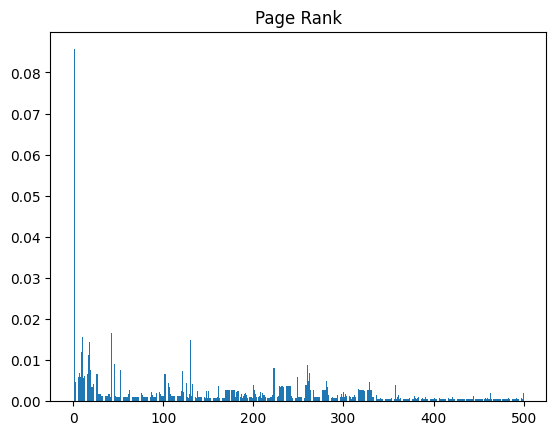

    Page-Rank   In Out                                                URL
                                                                         
1     0.08564  195  26                           [http://www.harvard.edu]
42   0.016699   42   0  [http://search.harvard.edu:8765/custom/query.h...
10    0.01568   21  18                               [http://www.hbs.edu]
130  0.014853   24  12                       [http://www.med.harvard.edu]
18   0.014367   45  46                       [http://www.gse.harvard.edu]
15   0.012947   16  49                       [http://www.hms.harvard.edu]


In [7]:
PageRank(U_Harvard,G_Harvard,.85,"Harvard University Graph")

Calculating PageRank of Indian Tourism University Website with p = 0.75

Converges to 1 after  0  iterations


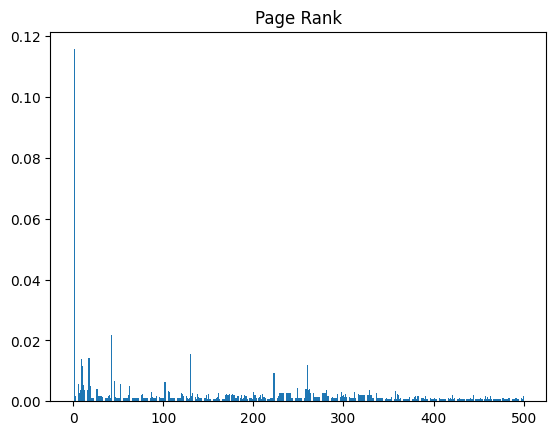

    Page-Rank   In Out                                                URL
                                                                         
1     0.11569  195  26                           [http://www.harvard.edu]
42   0.021873   42   0  [http://search.harvard.edu:8765/custom/query.h...
130  0.015676   24  12                       [http://www.med.harvard.edu]
17   0.014265   13   6                      [http://www.hsph.harvard.edu]
18   0.014237   45  46                       [http://www.gse.harvard.edu]
9    0.014049   21  27                       [http://www.ksg.harvard.edu]


In [8]:
PageRank(U_Harvard,G_Harvard,.75,"Harvard University Graph")

Conclusion for Harvard Website:

When the p value is changing the page rank values is changing slightly. So, the top ranked pages (1,2) are not getting effected.

Converges to 1 after  1  iterations


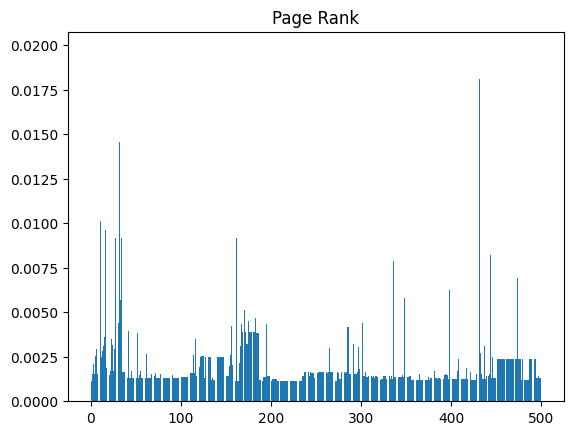

    Page-Rank  In Out                           URL
                                                   
10   0.019776  69   2           [http://www.nic.in]
432  0.018096   7   1  [http://www.makeinindia.com]
32   0.014549  36   0         [http://india.gov.in]
11   0.010146  59  61           [http://cmf.gov.in]
16   0.009635  40   0          [http://drupal.org)]
34   0.009191   3   0   [http://recruitment.nic.in]


In [9]:
PageRank(U_Ind_tour,G_Ind_tour,.85,"IndianTourism")

Calculating PageRank of Indian Tourism University Website with

Converges to 1 after  1  iterations


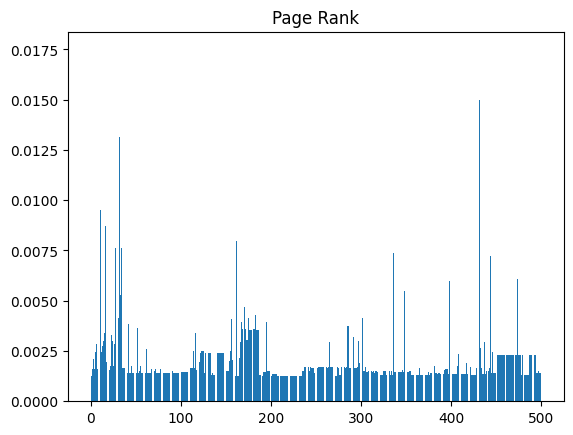

    Page-Rank  In Out                                  URL
                                                          
10   0.017508  69   2                  [http://www.nic.in]
432  0.014968   7   1         [http://www.makeinindia.com]
32   0.013136  36   0                [http://india.gov.in]
11   0.009518  59  61                  [http://cmf.gov.in]
16   0.008718  40   0                 [http://drupal.org)]
162  0.007964  25   1  [http://subscribe.businessworld.in]


In [10]:
PageRank(U_Ind_tour,G_Ind_tour,.75,"IndianTourism")

Conclusion for IndianTourism Website:

When the p value is changing the page rank values is changing slightly. So, the top ranked pages (1,2) are not getting effected.

From above observations ,we can infer that by varying p value, pageranks are
varied, obviously graph is varied with p because we are plotting pageranks vs
index of websites in U and there is no guarantee that same websites will stay
in top positions if p is varied.